# Lesson 3 - data visualization problems and data types

## When looking into a dataset, we have different tasks in terms of visualizations:   
1. understand the set of possible values for each variable and identify typical distributions   
  - which values are more common,   
  - check for outliers, missing data,   
  - etc..  
2. check how variables are correlated  
  - how values evolve overtime (if one variable is time!),  
  - how distributions change when we fix a subset of variables,  
  - pairwise correlations,  
  - etc..  
3. support your business analysis and convey relevant messages in a compelling way!
  - show growth potential in a given market
  - show relations between markets.

## How we address these tasks depends on the type of variables
- numerical: discrete, continuous; intervals, ratios;  
- categorical: nominal and ordinal;  
- (boolean)
- special variables - pairwise relations, coordinates/geographical (to be addressed later on)

For the following lectures, the classes content will be divided as  
- analysis and visualization of single numerical variables  (in this lecture)
- analysis and visualization of single categorical variables (in this lecture) 
- analysis and visualization of categorical vs categorical variables  
- analysis and visualization of categorical vs numerical variables  
- analysis and visualization of numerical vs numerical variables  

# Summary
In this lecture, in terms of **data visualization concepts** we will address:
1. how to rapidly extract insights on a variable distribution: max, min values and probability of values in between
1. common pitfalls when representing histograms  
1. main elements in plot -> labels and titles\!  


In this lecture in terms of **programming skills** we will see how to:  
1. load a dataset  
1. plot graphs with a single variable, adding axis labels and titles  
1. plot multiple graphs side by side, aligning scales across plots  
1. plot histograms, density plots and kernel density estimator (kde) function plots  
1. plot in subplots  
1. plot bar plots for categorical variables

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# You were given the task of extracting insights for the cars industry
Namely, you want to understand main specs and their typical value   
We start by looking into dataset, and check what type of variables we have, i.e., if they are numercal or categorical

In [ ]:
#TODO:
# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**In the example, we have variables that are straight forward categorical**  
--CarName  
--fueltype   
--aspiration  
--carbody  
--drivewheel  
--enginelocation  
   
**variables that are straight forward numerical**  
--wheelbase   
--enginesize  
--stroke  
--compressionratio  
--horsepower 	 
--peakrpm  
--citympg  
--highwaympg  
--price  
  
**variables that while numerical, do not have order...**  
--car_ID  
 
**variables that while categorical do have order...**  
 --symboling (insurance risk rating +3 is risky, -3 is pretty safe)  
 --doornumber  

### You can check the type of variable directly 
use dataframe method df.info()
-- numerical variables are floats and ints
-- categorical show as object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## NOTE: For the purpose of data visualization:  
--numerical variables that represent ids are not really interesting  
--they do not really contain information! 

For **data representation and understanding, we could drop the car_ID and we should not use it in our analysis** 

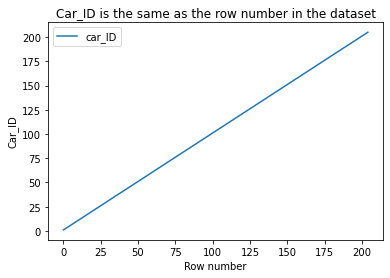

In [ ]:
# ploting the car id shows us that it is just the row number in the dataset
df.plot(y="car_ID"); 
plt.xlabel("Row number")
plt.ylabel("Car_ID")
plt.title("Car_ID is the same as the row number in the dataset");

### Programming Notes: single plots
1 - We are plotting using the pandas dataframe plot function:  
your_pandas_dataframe.plot(y=name_of_column_you_want_to_plot)

In the example we had df.plot(y="Car_ID")  
-- your_pandas_dataframe was df  
-- name_of_column_you_want_to_plot was  Car_ID

When we just have a single plot, we can add the xlabel and the ylabe calling directly the pyplot library that is actually doing all the rendering. Hence:  
-- we add the xlabel as: plt.xlabel("your x label")  
-- we add the ylabel as: plt.ylabel("your y label")  
-- we add the title as: plt.title("The main take away from the plot")  

## Numerical: discrete, continuous; intervals, ratios;

### Representing numerical and continuous
Possible tasks:   
--- Check values distribution  
Usual challenges:  
--- we need to "binarize" the data  
--- handling outliers and unevenly distributed data  

We start by analysing the wheelbase (length between front and rear wheels)  
https://www.carspiritpk.com/2018/12/advantages-of-longer-wheelbase/  

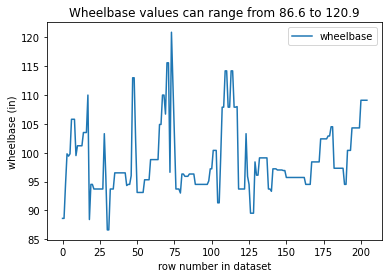

In [ ]:
# we again plot directly the variable againts the row number
fig,sp = plt.subplots(1,1);
df.plot(y="wheelbase", ax=sp)
plt.xlabel("row number in dataset")
plt.ylabel("wheelbase (in)")
plt.title(f"Wheelbase values can range from {df['wheelbase'].min()} to {df['wheelbase'].max()}");

### Important things in the plot:  
1. Axes have labels\!\!\!   
2. Axes have units!!\!   
3. Titles do not describe the content in the graph - they highlight your main message!
_______________________________________________________________________________________________________________
**Very important: Any plot that does not have these three very simples, very easy to forget, features, is not considered in tests, exams or projects.**
_______________________________________________________________________________________________________________
### Is this plot useful?
Yes:  
* It gives us information on possible range of values for the variable  : 

No:  
* The values are not related in any way. I could have just created a random number generator.


How can I showcase these values in a more elegant way?  
* order the values before plotting;  
* just create a histogram.  

### Try it yourself:
1. Repeat the above exercise, but using the car width

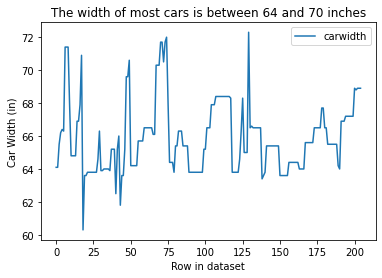

In [ ]:
# 1 - initialise the figure and subfigure
fig,sp = plt.subplots(1,1);
# 2 - plot the car width using the subfigure
df.plot(y="carwidth", ax=sp)
# 3 - add axis labels to the plot
sp.set_xlabel("Row in dataset")
sp.set_ylabel("Car Width (in)")
# 4 - add a title (I will randomly ask for titles, so remember to choose something insightful)
sp.set_title("The width of most cars is between 64 and 70 inches"); 

### Second try at plotting wheelbase values: Ordering values

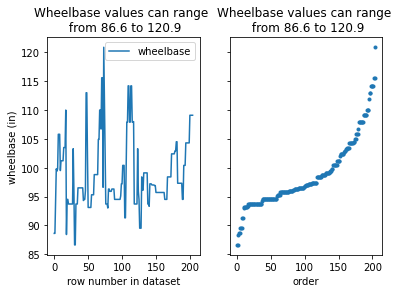

In [ ]:
fig,sp = plt.subplots(1,2, sharey=True);

df.plot(y="wheelbase", ax=sp[0])
sp[0].set_xlabel("row number in dataset")
sp[0].set_ylabel("wheelbase (in)")
sp[0].set_title(f"Wheelbase values can range \n from {df['wheelbase'].min()} to {df['wheelbase'].max()}");

df_1 = df[["wheelbase"]].copy() # we copy the column, so that we can sort the dataset without changing it
df_1.sort_values(by="wheelbase", inplace=True)
df_1.reset_index(inplace=True, drop=True)
df_1.wheelbase.plot(ax=sp[1], style='.')
sp[1].set_xlabel("order")
sp[1].set_ylabel("wheelbase (in)")
sp[1].set_title(f"Wheelbase values can range \n from {df['wheelbase'].min()} to {df['wheelbase'].max()}");


### Important things in the plots:
3. The y axis is shared! 

If you present two plots side by side, and they represent the same units
in the y axis:   
-- They should have the same upper and lower limit!

### Is this plot useful:
Yes:  
-- I now have a more clear perception of wheelbase distribution, namely that the median is around 97  
No:   
-- I still have to think a bit to infer relevant statistical information, e.g., mode.

### Programming notes: multiple plots  
Before doing multiple plots, we must declare the final layout, initializing the figure (that will represent the collection of all the plots) and the axis of each plot.
If we want our figure to have n_total = n_rows x n_col plots, distributed by n_rows and n_plots, the we would use:  
_____________________________________________________
fig,sp = plt.subplots(n_rows, n_cols, sharey=True);   
_____________________________________________________
**fig** is the global figure where all the plots are -> we do not usually need it when using notebooks.   
**sp** is a vector (or matrix if n_rows > 1) with the information for each plot.  
if previously we set axes properties, e.g., labels and titles, using **plt.xlabel** and **plt.ylabel** now we have to use:
_____________________________________________________
sp\[plot_number\].set_xlabel("your_x_label)  
sp\[plot_number\].set_ylabel("your_y_label)  
sp\[plot_number\].set_title("your_main_take_away_from_the_plot")
_____________________________________________________

When **using the pandas library for plotting**, we assign each plot to its axis using the **ax** keyword in the **pandas plot** function.
________________________________________________
df.plot(y="wheelbase",ax=sp[0])
________________________________________________

### Programming Notes: re-ordering the dataset
Before re-ordering, we need to copy the dataset:  
-- in this case, as we only care about the wheelbase column, we only copy that column   
-- if we reorder the dataset with no copy, we are changing the order of the dataset for all the other graphics.  
-- after reordering, we must reset the index so that it reflects the new order and we must drop the old one  
________________________________________
df_1 = df[["wheelbase"]].copy()   
df_1.sort_values(by="wheelbase", inplace=True)  
df_1.reset_index(inplace=True, drop=True)  
_____________


### Programming notes: plotting Series
When we select a single row of a pandas dataframe, we get a Series (a different data structure)   
We can plot directly a series without having to specify the y argument  
Where we had **df.plot(y="wheelbase")** , we could have: **df.wheelbase.plot()** or **df["wheelbase"].plot()**
Recall:  
-- **df.wheelbase** is the same as **df["wheelbase"]** and returns a Series  
-- **df[["wheelbase"]]** -> with the double parentheses <- returns a dataframe\!

In [ ]:
df_1["norm_row_number"] = np.arange(1,len(df_1)+1)/len(df_1)

### Try it yourself:
2. add a different x axis to your plot: a normalized version of the row number  
You can add a x variable by adding a new column to your dataframe. In this case we can do  
df_1["norm_row_number"] = 100 * np.arange(1,len(df_1)+1)/len(df_1)  
for ploting, you just need to add a new keyword in the plot method: x="norm_row_number"
3. **Question** ->  what is the meaning of this new x axis? E.g., what does 50 represents?

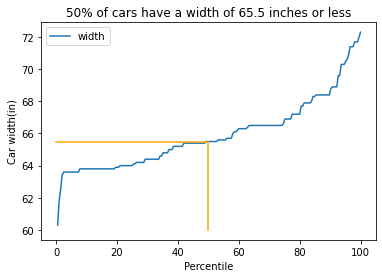

In [ ]:
# 1 - add the new column to your dataframe
df_1 = df[["carwidth"]].copy() # we copy the column, so that we can sort the dataset without changing it
df_1.sort_values(by="carwidth", inplace=True)
df_1.reset_index(inplace=True, drop=True)
df_1["norm_row_number"] = 100*np.arange(1,len(df_1)+1)/len(df_1)
# 2 - initialise the figure and subfigure
fig,sp = plt.subplots();
# 3 - plot the car width using the subfigure and with the new 
df_1.plot(x="norm_row_number", y="carwidth", ax=sp, label = "width")
# 4 - add axis labels to the plot
sp.set_xlabel("Percentile")
sp.set_ylabel("Car width(in)")
# 5 - add a title (remember to choose something insightful - e.g., answer the question)
sp.set_title("50% of cars have a width of 65.5 inches or less");
# if you wish the drive the message home, add lines (eg. highlight the percentile 50 that is 65.5) 
sp.plot([50,50],[60,65.5],"orange")
sp.plot([0,50],[65.5,65.5],"orange");

### Third try at plotting wheelbase values: using histograms
But to create histograms from numerical data, we must first define the bins we will use to separate them.
-- If we use wide bins, all the data will fall on the the same bins and we will not see all the detail we want
-- If we use thin bins, we will have many bins with just a data point or no data at all.

We often do not have to set the bins directly (albeit we can if we want to!). We just need to provide the number of bins we want, matplotlib will check the values max and min and divide this range in equally spaced bins.  

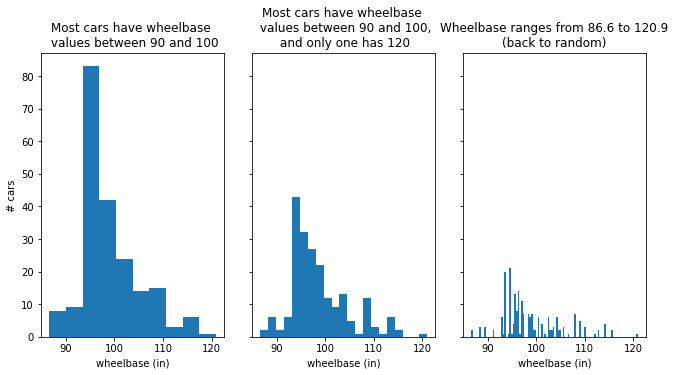

In [ ]:
fig,sp = plt.subplots(1,3, sharey=True);

df.wheelbase.plot(ax=sp[0], kind= "hist")
sp[0].set_xlabel("wheelbase (in)")
sp[0].set_ylabel("# cars")
sp[0].set_title(f"Most cars have wheelbase \n values between 90 and 100");

df.wheelbase.plot(ax=sp[1], kind= "hist", bins=21)
sp[1].set_xlabel("wheelbase (in)")
sp[1].set_ylabel("# cars")
sp[1].set_title(f"Most cars have wheelbase \n values between 90 and 100,\n and only one has 120");

df.wheelbase.plot(ax=sp[2], kind= "hist", bins=100)
sp[2].set_xlabel("wheelbase (in)")
sp[2].set_ylabel("# cars")
sp[2].set_title(f"""Wheelbase ranges from {df['wheelbase'].min()} to {df['wheelbase'].max()}\n(back to random)""");

plt.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(6*1.618)

### Important things in the plot:
It can be hard to choose the bins for a histogram  
-- If the number of bins is small, we lose detail.  
-- If the number of bins is large, we lose the big picture  

There is no rule on how to choose the number of bins for your data.  
The default in python is usually 10 bins, and, usually, that is ok in 50% of the histograms.   

### Programming notes: plotting histograms
To plot a histogram we just need to add the keyword "kind" as an argument to the plot function and set it to "hist".  
We can define the bin width by choosing the number of bins in the "bins" keyword  
The code below was used for the plot on the right  
__________________________
df.wheelbase.plot(ax=sp[2], kind= "hist", bins=100)
_________________

-- We note that we can create all this without having to explicitly compute the histogram\!

### Programming notes: again on multiple plots
We can set the figure size using:  
**plt.tight_layout()**  --> reduces the gap between subplots  
**fig.set_figheight(6)** --> sets height  
**fig.set_figwidth(6*1.618)** -> sets width (I am using the golden ratio)  

### Is the plot useful:
Yes:   
-- I now have a clear picture of how common are each segments of wheelbases  
No:  
-- Often we want to convey the relative weights of each segment so that we can estimate percentages directly   

### Forth try: using relative values in the histogram
-- We have to normalise the histogram before ploting
-- We have to use lower level ploting functions directly from matplotlib

In [ ]:
import numpy as np
n, bins = np.histogram(df["wheelbase"], bins = 21)
dens = n/n.sum()

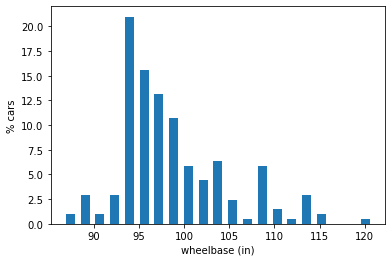

In [ ]:
plt.bar(x=(bins[1:]+bins[:-1])/2, height=100*dens, width=1.)
plt.xlabel("wheelbase (in)")
plt.ylabel("% cars");

### Important things in the plot:
The plot is not mathematically sound:  
-- the bins do not cover the complete set of values that they represent  
-- the percentage of cars we are assigning to each bin corresponds to the probability of a car to have a wheelbase value in a given bin 

### Programming notes:
I've used the numpy histogram function to compute the histogram, again specifying the number of bins  
________________________________________________
np.histogram(df["wheelbase"], bins = 21)
_______________________________________________
This function returns the lower and upper limit value for each bin and the number of elements inside each bin.  

When plotting, I used the matplotlib bar function. 
This function generates bar plots, but receives as input the center coordinate for each bar, not the start and end that we received from the histogram -> thus we must compute the center (bins[1:]+bins[:-1])/2.   
____________________________________
plt.bar(x=(bins[1:]+bins[:-1])/2, height=100*dens, width=1.)  
_______________________________

Recall that the first element of an iterable object in python is in position 0, so bins[1:] returns all the elements in bins minus the first element.   
The last element is in -1, thus bins[:-1] returns all elements except the last.  


### Word to the wise:
You will find more easy ways to implement this using df.hist(density=True) or even prettier plots of density estimation with kde  
-- The behaviour is very different from what you would expect:  
--- in a density plot the total *area* of all the bins is 1;   
--- if you reduce the width, the height will increase.

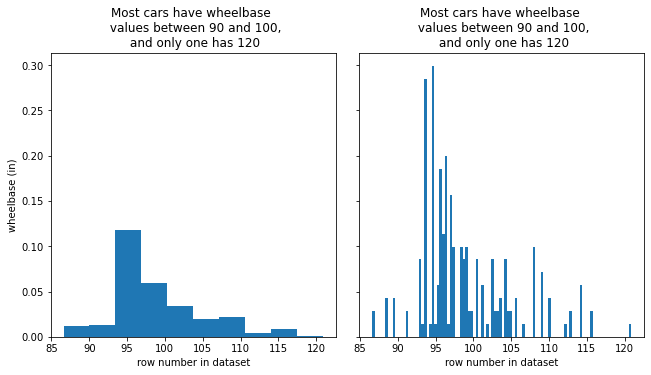

In [ ]:
fig,sp = plt.subplots(1,2, sharey=True);
import scipy
u = df.wheelbase.plot(ax=sp[0],style='.',kind= "hist",  density=True)
sp[0].set_xlabel("row number in dataset")
sp[0].set_ylabel("wheelbase (in)")
sp[0].set_title(f"Most cars have wheelbase \n values between 90 and 100,\n and only one has 120");


df.wheelbase.plot(ax=sp[1],style='.',kind= "hist", bins=100, density=True)
sp[1].set_xlabel("row number in dataset")
sp[1].set_ylabel("wheelbase (in)")
sp[1].set_title(f"Most cars have wheelbase \n values between 90 and 100,\n and only one has 120");


plt.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(6*1.618)

## Take away so far:  
**Rule 1**  do NOT, under any circunstance, force your viewers to think  
**Corolary 1** Do not forget axis labels and titles  
**Corolary 2** Do not forget units\!    
**Corolary 3** Share the same scale in axis represented side by side  
**Corolary 4** Normalize histograms  

## Skweness  
This is all very nice, but real data will not always look as pretty as the above dataset.  
**Real world data is skwed** but we need to provide details on both the *global distribution* and on its *limits*      
-- Most real data will have long tails and exponential behaviour.   
-- How to represent this data?  

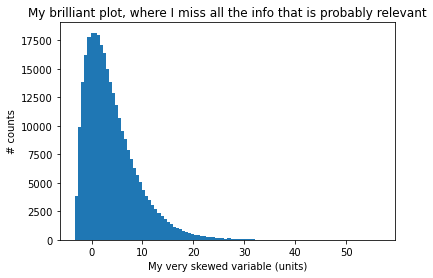

In [ ]:
exp_dist_1 = 4* np.random.exponential(size=300000) - 3.2 * (1-np.random.exponential(size=300000))
plt.hist(exp_dist_1,bins = 100);
plt.xlabel("My very skewed variable (units)")
plt.ylabel("# counts")
plt.title("My brilliant plot, where I miss all the info that is probably relevant");

A good approach is to use logarithm axis

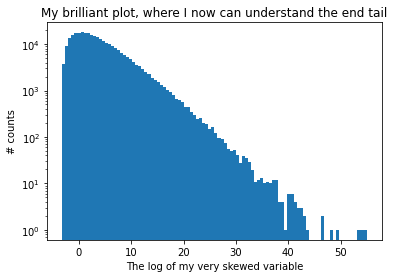

In [ ]:
plt.hist(exp_dist_1,bins = 100);
plt.yscale('log', nonposy='clip');
plt.xlabel("The log of my very skewed variable")
plt.ylabel("# counts")
plt.title("My brilliant plot, where I now can understand the end tail");

However, sometimes adding a logarithm will also add extra explaining.
Another approach is to have two plots, with one highlighting the area that is zoomed in the second plot

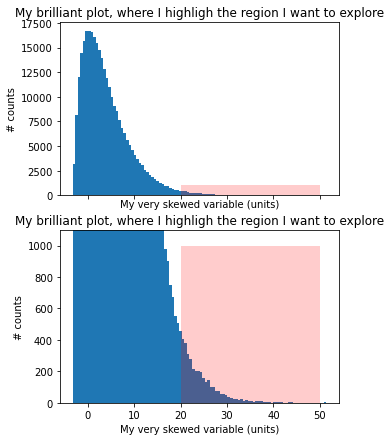

In [ ]:
from matplotlib.patches import Rectangle
fig, sp = plt.subplots(2,1, sharex=True, figsize=(5,7))
exp_dist_1 = 4* np.random.exponential(size=300000) - 3.2 * (1-np.random.exponential(size=300000))
sp[0].hist(exp_dist_1,bins = 100);
sp[0].set_xlabel("My very skewed variable (units)")
sp[0].set_ylabel("# counts")
sp[0].set_title("My brilliant plot, where I highligh the region I want to explore");
re = Rectangle((20,0),30,1000, facecolor="r", alpha=0.2)
sp[0].add_patch(re)

# we add the second plot - which is basically a copy of the first, but with diferent x and y limits
sp[1].hist(exp_dist_1,bins = 100);
sp[1].set_xlabel("My very skewed variable (units)")
sp[1].set_ylabel("# counts")
sp[1].set_title("My brilliant plot, where I highligh the region I want to explore");
re = Rectangle((20,0),30,1000, facecolor="r", alpha=0.2)
sp[1].add_patch(re)
sp[1].set_ylim((0,1100));

### Programming notes: plotting in logaritmic scale
-- Just add: **plt.yscale('log', nonposy='clip')**  
-- You can find other representations here: https://matplotlib.org/3.1.1/api/scale_api.html#matplotlib.scale.LogitScale
### Programming notes: recall python basics:
-- **np.random.exponential(size=X)** returns X samples from a random variable with an exponential probability distribution function. I have not set the seed, so each time you run the paragraph it will generate a new set of X values.
### Programming notes: patches and styles:
-- find more about patches here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html  
-- alpha controls transparancy - 0 => invisible, 1 => 100%opaque! 

### Other ways of representing distributions  
**Box plots**, or whisker plots, represent the min, max and outliers of your distribution  
The box itself represents the percentile 25 to 75, and the line represents the median.  
**Violin plots** are a special type of kernel density estimator function plots and approximate the values continuous probability distribution.

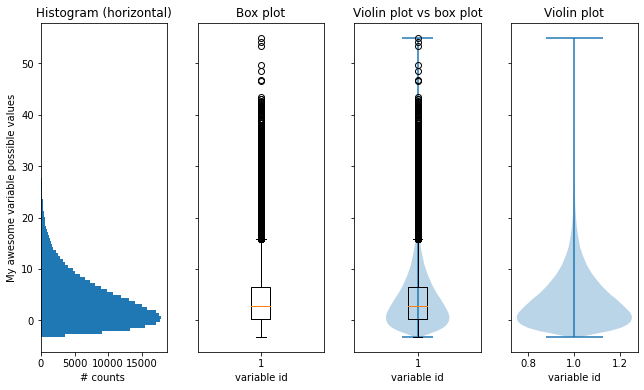

In [ ]:
fig, sp = plt.subplots(1,4,sharey = True)
sp[1].boxplot(exp_dist_1);
sp[1].set_xlabel("variable id")
sp[1].set_title("Box plot")

sp[3].violinplot(exp_dist_1);
sp[3].set_xlabel("variable id")
sp[3].set_title("Violin plot")


sp[2].boxplot(exp_dist_1);
sp[2].violinplot(exp_dist_1);
sp[2].set_xlabel("variable id")
sp[2].set_title("Violin plot vs box plot")


sp[0].hist(exp_dist_1, bins=100, orientation="horizontal");
sp[0].set_xlabel("# counts ")
sp[0].set_ylabel("My awesome variable possible values")
sp[0].set_title("Histogram (horizontal)")


plt.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(6*1.618)

### Try it yourself
4. Represent the compression ratio with at least one of the above representations

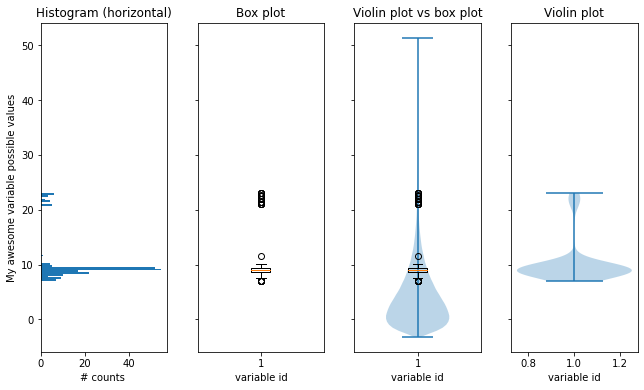

In [ ]:
fig, sp = plt.subplots(1,4,sharey = True)
sp[1].boxplot(df[["compressionratio"]]);
sp[1].set_xlabel("variable id")
sp[1].set_title("Box plot")

sp[3].violinplot(df[["compressionratio"]]);
sp[3].set_xlabel("variable id")
sp[3].set_title("Violin plot")


sp[2].boxplot(df[["compressionratio"]]);
sp[2].violinplot(exp_dist_1);
sp[2].set_xlabel("variable id")
sp[2].set_title("Violin plot vs box plot")


sp[0].hist(df[["compressionratio"]], bins=50, orientation="horizontal");
sp[0].set_xlabel("# counts ")
sp[0].set_ylabel("My awesome variable possible values")
sp[0].set_title("Histogram (horizontal)")


plt.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(6*1.618)

## Probability density functions and Kernel density estimation

Violin plots are density estimation plots (we will see them often here)  
They are pretty  
They present a smooth version of our often noisy data.  

Outside from the classroom and text book examples, we only have access to samples of data. 
We do not know the real probability distribution function that originated the data.  
However, we need really large amounts of data so that the frequency of events we observe actually map the real probability distribution.  

### Example of bias in estimating distributions 
I introduced a numerical experiment where I randomly generate a few draws from a dice.  
In the first experiment I generated 10 draws, in the second 20, then 100 and finally 1000.
The distribution over the possible outcomes - from 1 to 6 - is represented in the following plots for each experiment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

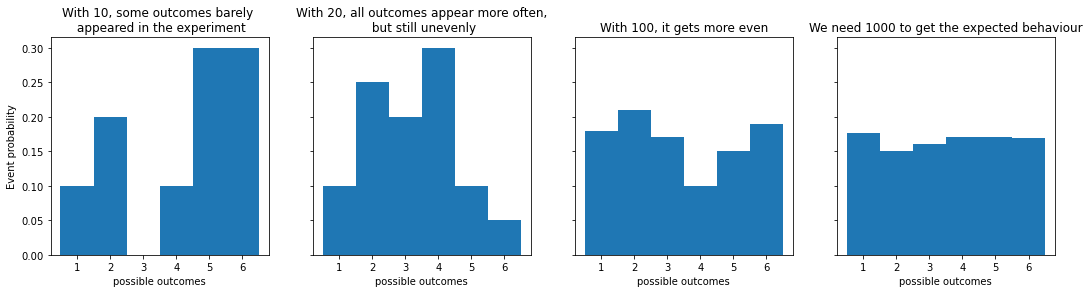

In [ ]:
fig, ax = plt.subplots(1,4,sharey=True,figsize=(18, 4))
die_10 = np.random.randint(low=1,high=7,size=10)
die_20 = np.random.randint(low=1,high=7,size=20)
die_100 = np.random.randint(low=1,high=7,size=100)
die_1000 = np.random.randint(low=1,high=7,size=1000)
experiments = [die_10,die_20,die_100,die_1000]
ax[0].set_ylabel("Event probability")
[ax[i].hist(experiments[i],bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5], density=True) for i in range(len(experiments))];
[ax[i].set_xlabel("possible outcomes") for i in range(len(experiments))];
ax[0].set_title("With 10, some outcomes barely \n appeared in the experiment")
ax[1].set_title("With 20, all outcomes appear more often,\n but still unevenly")
ax[2].set_title("With 100, it gets more even")
ax[3].set_title("We need 1000 to get the expected behaviour");

### Important things in the plots:
Just because we do not see a value in the dataset, it does not mean that it has a lower probability of showing up:
-- if we have few samples, even if two events are equally probable, their frequency in an experiment can be very uneven.
-- we should be careful when assigning frequency to probabilities

### Programming notes: recalling python basics
1. List comprehention:
This:  
[ax[i].hist(experiments[i],bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5], density=True) for i in range(len(experiments))];  
is the same as:  
for i in range(len(experiments)):  
     ax[i].hist(experiments[i],bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5], density=True)  

2. Here we can actually use the density option as we are basically looking into a categorical ordinal feature   

3. **np.random.randint(low=1,high=7,size=10)** draws 10 samples from an identically distributed integer random variable, ranging from 1 to 7 (excluding)

### Parametric distributions
When we have a model that tells us the overall shape of the probability density function, we can parametrize it and we can fit observations so that we can estimate the parameters.  
-- Example: If I know that the noise in my electronics is a random noise that follows a gaussian curve, I can estimate the mean and the standard deviation that best fit the curve

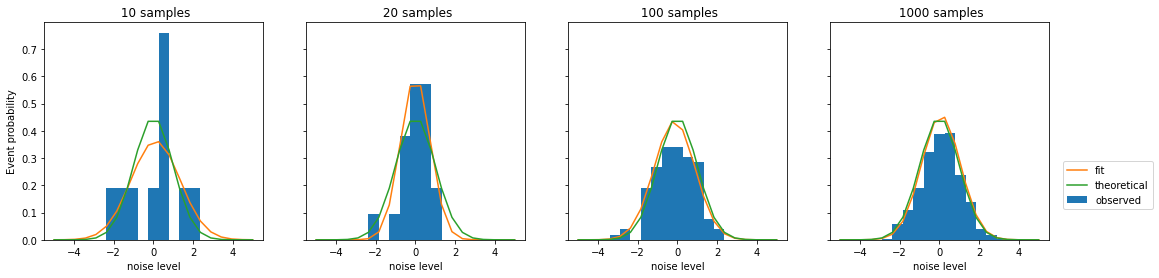

In [ ]:
fig, ax = plt.subplots(1,4, sharey=True, figsize=(18,4))
spl_10 = np.random.randn(10)
spl_20 = np.random.randn(20)
spl_100 = np.random.randn(100)
spl_1000 = np.random.randn(1000)
experiments = [spl_10,spl_20,spl_100,spl_1000]
exp_mean = [spl.mean() for spl in experiments]
exp_std = [spl.std() for spl in experiments]
ax[0].set_ylabel("Event probability")
# computing a gaussian distribution from mean and standard deviation
x = np.linspace(-5,5,20)
gauss_exp = [np.exp(-(x-exp_mean[i])**2/(2*exp_std[i]**2))/(np.pi*np.sqrt(2)*exp_std[i]) for i in range(len(experiments))]
gauss_theo = np.exp(-(x)**2/(2))/(np.pi*np.sqrt(2)) 
dx = len(x)/(x[-1]-x[0]) # we are representing densities - the area is 1! - we need the width of each bar
[ax[i].hist(experiments[i],bins=x, density=True, label="observed") for i in range(len(experiments))];
[ax[i].plot(x, gauss_exp[i]*dx, label="fit") for i in range(len(experiments))];
[ax[i].plot(x, gauss_theo*dx, label="theoretical") for i in range(len(experiments))];
ax[-1].legend(loc="center right", bbox_to_anchor=(1., 0., 0.5, 0.5));
[ax_.set_xlabel("noise level") for ax_ in ax];
[ax[i].set_title(f" {len(experiments[i])} samples") for i in range(len(experiments))];

However, we often do not have such a model.  
To estimate the probability density function from a **set of observations from which we have no apriori expectation** we often use kernel density estimation. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html?highlight=gaussian


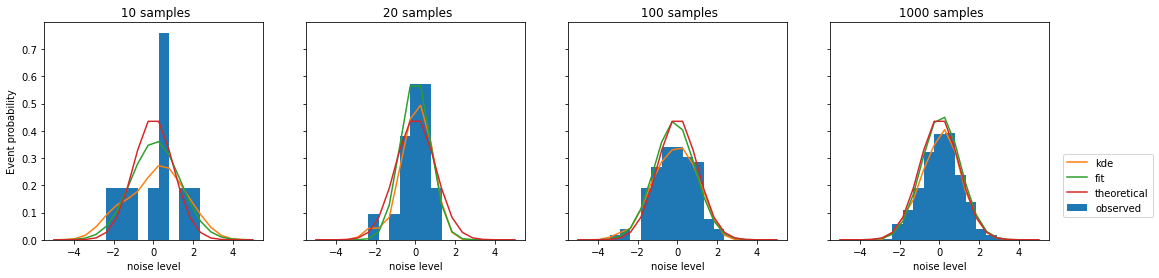

In [ ]:
fig, ax = plt.subplots(1,4,sharey=True,  figsize=(18,4))
from scipy import stats
kde = [stats.gaussian_kde(ex) for ex in experiments]
ax[0].set_ylabel("Event probability")
[ax[i].hist(experiments[i],bins=x, density=True, label="observed") for i in range(len(experiments))];
[ax[i].plot(x, kde[i](x), label="kde") for i in range(len(experiments))];
[ax[i].plot(x, gauss_exp[i]*dx, label="fit") for i in range(len(experiments))];
[ax[i].plot(x, gauss_theo*dx, label="theoretical") for i in range(len(experiments))];
[ax_.set_xlabel("noise level") for ax_ in ax];
[ax[i].set_title(f" {len(experiments[i])} samples") for i in range(len(experiments))];
ax[-1].legend(loc="center right", bbox_to_anchor=(1., 0., 0.5, 0.5));

### Important things in the examples:
-- When representing more than one variable in the same plot -- always use a legend\!   
-- Ensure that the legend does not affect your plot  
-- Kernel density estimation still provides a much better estimation than the observed distributions

### Programming notes: recalling python basics:
-- scipy is the standard scientific library for python. It has a statistics model, which you can use to compute the kde with different kernels. 
___________________
from scipy import stats  
kde = [stats.gaussian_kde(ex) for ex in experiments]
__________________________

### Programming notes: adding legends to your plot:
To add a legend to your plot, you first need to add the label keyword when plotting:  
**ax[i].hist(experiments[i],bins=x, density=True, label="observed")**  
then decide on where to place it using the legend method from the subplot with the loc argument. Normally loc will place the legend inside the plot. To add a shift, use bbox_to_anchor  
**ax[i].legend(loc="center right", bbox_to_anchor=(1., 0., 0.5, 0.5))**



### Take aways:
When representing histograms be careful not to associate them directly with probabilities  
-- If you do not have enough data, you are introducing a bias in the viewers perception  
-- The best option is to use a parametric probability estimator, but most often you do not know the theorectical distribution    
-- When you have no extra information regarding the data distribution besides your sampled data, then use a kde with your data!  

## Representing categorical data
You can always plot histograms...  
Things to take into consideration
* number of categories
* order 
* NO PIES! 

Typical python libraries will not do histograms of categorical variables from scratch  
In pandas:  
    - first convert your variable to a frequency table;  
    - then use a bar plot;  
    - finally: add the numbers.  

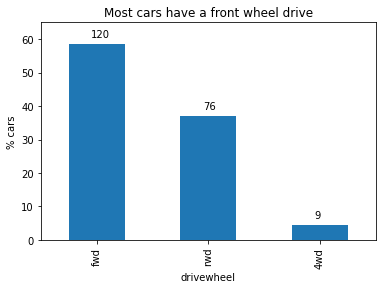

In [ ]:
hist_drivewheel = df.drivewheel.value_counts() 
(100*hist_drivewheel/len(df)).plot(kind='bar') 
for x in range(len(hist_drivewheel)):
    plt.text(x-0.05, (100* hist_drivewheel[x]/len(df)+2), hist_drivewheel[x])
plt.ylim(0,65)
plt.ylabel("% cars")
plt.xlabel("drivewheel")
plt.title("Most cars have a front wheel drive");

### Important things in this representation:
1. We have added the total value of each category on the top of the respective bar to give a perspective of the total number of elements in each group

### Programming notes:
1. Unfornatly matplotlib provides no standard way of adding the number on top of each bar, so we have to add them manually using the **plt.text(x_coor, y_coor,text_to_add)** function, that plots text_to_add at (x_coor, y_coor).  
**x_coor** should be an integer that represents the order of the category.  
**y_coor** should be retrieved from the histogram itself

2. To compute the histogram of a categorical variable we pandas, we use the value_counts() method:  
_______________________
hist_drivewheel = df.drivewheel.value_counts() 
______________________________

### Try it yourself
5- repeat the above example for the car body

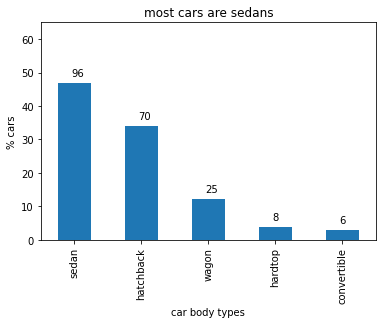

In [ ]:
hist_carbody = df.carbody.value_counts() 
(100*hist_carbody/len(df)).plot(kind='bar') 
for x in range(len(hist_carbody)):
    plt.text(x-0.05, (100* hist_carbody[x]/len(df)+2), hist_carbody[x])
plt.ylim(0,65)
plt.ylabel("% cars")
plt.xlabel("car body types")
plt.title("most cars are sedans");